In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ulabox-orders-with-categories-partials-2017/ulabox_orders_with_categories_partials_2017.csv


In [2]:
import matplotlib.pyplot as plt
# from kneed import KneeLocator
#from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [3]:
df=pd.read_csv("/kaggle/input/ulabox-orders-with-categories-partials-2017/ulabox_orders_with_categories_partials_2017.csv")

In [4]:
df.shape

(30000, 14)

In [5]:
df.columns

Index(['customer', 'order', 'total_items', 'discount%', 'weekday', 'hour',
       'Food%', 'Fresh%', 'Drinks%', 'Home%', 'Beauty%', 'Health%', 'Baby%',
       'Pets%'],
      dtype='object')

In [6]:
df.isnull().sum()

customer       0
order          0
total_items    0
discount%      0
weekday        0
hour           0
Food%          0
Fresh%         0
Drinks%        0
Home%          0
Beauty%        0
Health%        0
Baby%          0
Pets%          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer     30000 non-null  int64  
 1   order        30000 non-null  int64  
 2   total_items  30000 non-null  int64  
 3   discount%    30000 non-null  float64
 4   weekday      30000 non-null  int64  
 5   hour         30000 non-null  int64  
 6   Food%        30000 non-null  float64
 7   Fresh%       30000 non-null  float64
 8   Drinks%      30000 non-null  float64
 9   Home%        30000 non-null  float64
 10  Beauty%      30000 non-null  float64
 11  Health%      30000 non-null  float64
 12  Baby%        30000 non-null  float64
 13  Pets%        30000 non-null  float64
dtypes: float64(9), int64(5)
memory usage: 3.2 MB


In [8]:
df.columns = ['customer', 'order', 'total_items', 'discount_percent', 'weekday', 'hour','food_percent', 'fresh_percent', 'drinks_percent', 'home_percent', 'beauty_percent', 'health_percent', 'baby_percent','pets_percent']

In [9]:
df.head(5)

,customer,order,total_items,discount_percent,weekday,hour,food_percent,fresh_percent,drinks_percent,home_percent,beauty_percent,health_percent,baby_percent,pets_percent
0,0,0,45,23.03,4,13,9.46,87.06,3.48,0.00,0.00,0.00,0.0,0.0
1,0,1,38,1.22,5,13,15.87,75.80,6.22,2.12,0.00,0.00,0.0,0.0
2,0,2,51,18.08,4,13,16.88,56.75,3.37,16.48,6.53,0.00,0.0,0.0
3,1,3,57,16.51,1,12,28.81,35.99,11.78,4.62,2.87,15.92,0.0,0.0
4,1,4,53,18.31,2,11,24.13,60.38,7.78,7.72,0.00,0.00,0.0,0.0


In [10]:
df.describe()

,customer,order,total_items,discount_percent,weekday,hour,food_percent,fresh_percent,drinks_percent,home_percent,beauty_percent,health_percent,baby_percent,pets_percent
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,5012.483367,14999.500000,31.739933,8.455495,3.642367,15.034667,23.560406,20.227279,23.349235,13.539575,5.892949,1.132959,11.096145,1.043087
std,2888.646245,8660.398374,20.576579,14.199350,2.122031,5.717052,21.719824,23.661767,22.523335,17.850282,13.996518,5.307620,24.740364,6.195390
min,0.000000,0.000000,1.000000,-65.150000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2541.750000,7499.750000,18.000000,1.177500,2.000000,11.000000,7.220000,0.000000,6.710000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5043.000000,14999.500000,29.000000,4.160000,3.000000,15.000000,19.650000,10.930000,17.890000,7.210000,0.000000,0.000000,0.000000,0.000000
75%,7483.000000,22499.250000,41.000000,9.990000,5.000000,20.000000,33.260000,35.790000,33.162500,20.002500,6.512500,0.000000,4.172500,0.000000
max,10238.000000,29999.000000,298.000000,100.000000,7.000000,23.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [11]:
df.discount_percent.mean()

8.4554950000001

In [12]:
df[df["total_items"]==(df.total_items.max())] #order details with the maximum total items

,customer,order,total_items,discount_percent,weekday,hour,food_percent,fresh_percent,drinks_percent,home_percent,beauty_percent,health_percent,baby_percent,pets_percent
16831,5656,16831,298,3.83,3,18,49.27,0.0,32.36,16.7,0.0,0.0,0.0,0.0


In [13]:
#Orders made on weekday vs order made on weekends

df_weekends = df[(df["weekday"]==7) | (df["weekday"]==6)]
df_weekdays = df[(df["weekday"]!=7) & (df["weekday"]!=6)]

In [14]:
df_weekends.shape[0]

7466

In [15]:
df_weekdays.shape[0]

22534

Intrestingly more orders were placed on the weekdays as compared to the weekends

In [16]:
len(df)

30000

In [17]:
len(df)-len(df.drop_duplicates()) #no duplicates in the dataset

0

Customer Segmentation

In [18]:
df_customer=df.drop_duplicates("customer",keep='first') 

In [19]:
df_customer

,customer,order,total_items,discount_percent,weekday,hour,food_percent,fresh_percent,drinks_percent,home_percent,beauty_percent,health_percent,baby_percent,pets_percent
0,0,0,45,23.03,4,13,9.46,87.06,3.48,0.00,0.00,0.00,0.0,0.0
3,1,3,57,16.51,1,12,28.81,35.99,11.78,4.62,2.87,15.92,0.0,0.0
23,2,23,26,2.97,6,23,24.10,22.29,38.69,14.92,0.00,0.00,0.0,0.0
24,3,24,28,2.21,1,10,36.51,31.93,27.18,4.38,0.00,0.00,0.0,0.0
47,4,47,23,0.65,3,9,8.23,82.63,9.14,0.00,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,10234,29994,1,0.00,4,16,0.00,0.00,0.00,0.00,0.00,0.00,100.0,0.0
29995,10235,29995,4,0.00,5,10,5.80,0.00,51.30,0.00,0.00,0.00,0.0,42.9
29996,10236,29996,1,0.00,7,21,0.00,0.00,0.00,0.00,100.00,0.00,0.0,0.0
29997,10237,29997,54,0.00,4,17,9.25,0.00,77.48,13.27,0.00,0.00,0.0,0.0


In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
#Segmenting cutomer based on the contents of the order specifically. 
data=df_customer.drop(['customer','order'],inplace=True,axis=1)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [22]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_customer)

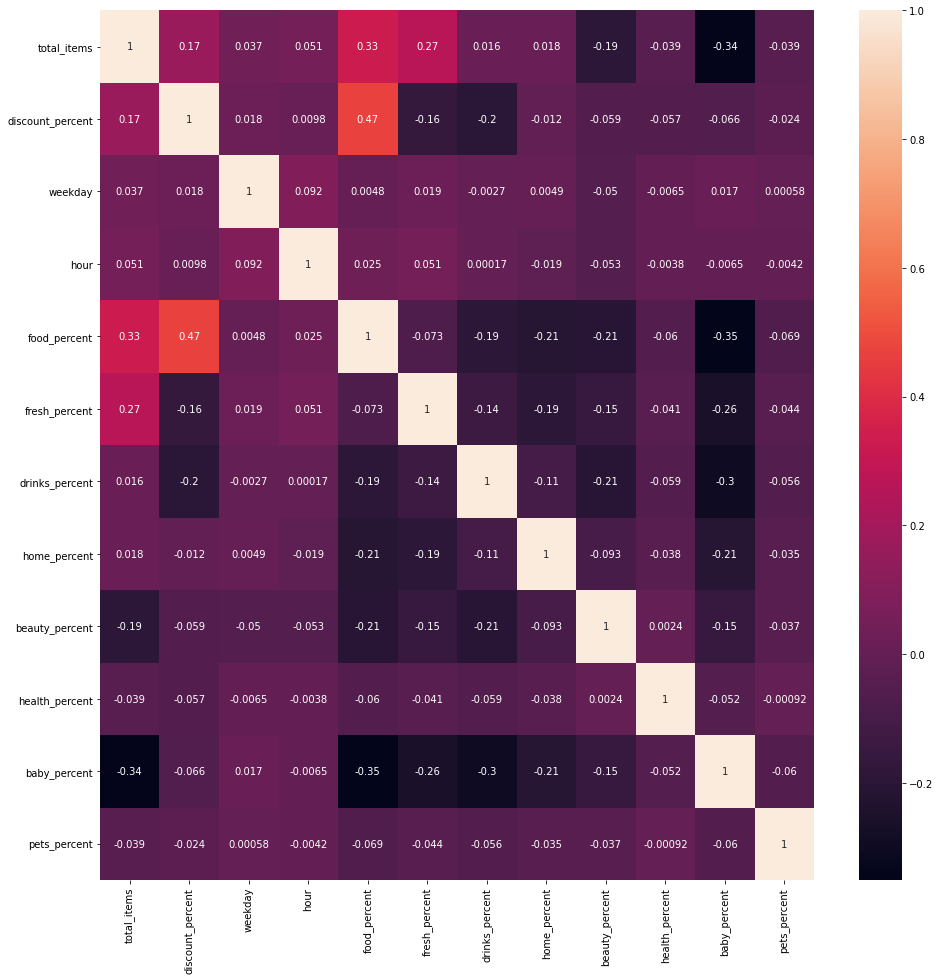

In [23]:
import matplotlib.pyplot as plt
df_corr = df_customer.corr()
fig, ax = plt.subplots(figsize=(16, 16))
ax = sns.heatmap(df_corr, annot=True)

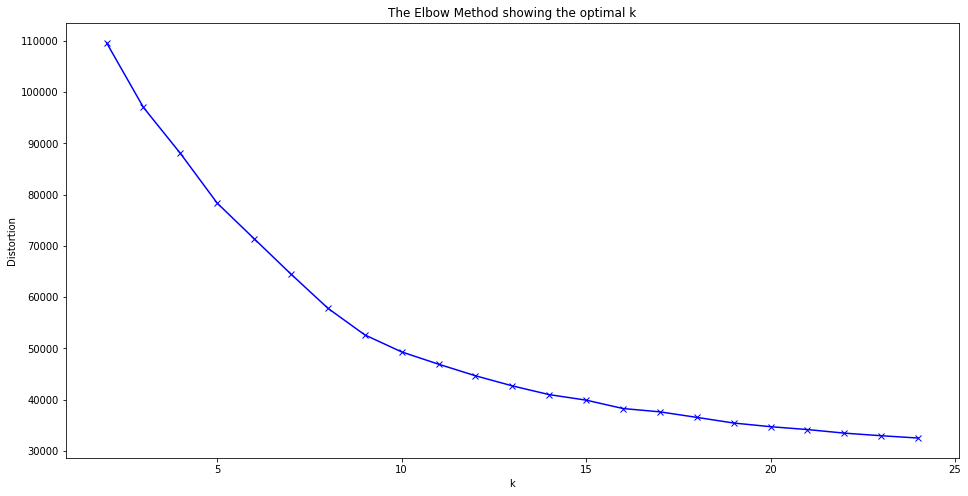

In [24]:
#How Many Number of Cluster Could Exists
#dff=df_customer.loc[:,:].values
dff = scaled_features
from sklearn.cluster import KMeans
wcss = []
for k in range(2,25):
    kmeanModel = KMeans(n_clusters=k,init="k-means++")
    kmeanModel.fit(dff)
    wcss.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(2,25), wcss, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [25]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [26]:
from kneed import KneeLocator
kl = KneeLocator(x=range(2, 25),y=wcss,curve="convex", direction="decreasing" )
kl.elbow

9

In [27]:
#import tarfile
#import urllib
#import numpy as np
import matplotlib.pyplot as plt
#import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [28]:
preprocessor = Pipeline([("scaler", StandardScaler()),("pca", PCA(n_components=2, random_state=42)),])

In [29]:
clusterer = Pipeline([("kmeans",KMeans(n_clusters=9,init="k-means++",n_init=50,max_iter=500,random_state=42,),),])

In [30]:
pipe = Pipeline([("preprocessor", preprocessor),("clusterer", clusterer)])

In [31]:
df_customer

,total_items,discount_percent,weekday,hour,food_percent,fresh_percent,drinks_percent,home_percent,beauty_percent,health_percent,baby_percent,pets_percent
0,45,23.03,4,13,9.46,87.06,3.48,0.00,0.00,0.00,0.0,0.0
3,57,16.51,1,12,28.81,35.99,11.78,4.62,2.87,15.92,0.0,0.0
23,26,2.97,6,23,24.10,22.29,38.69,14.92,0.00,0.00,0.0,0.0
24,28,2.21,1,10,36.51,31.93,27.18,4.38,0.00,0.00,0.0,0.0
47,23,0.65,3,9,8.23,82.63,9.14,0.00,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
29994,1,0.00,4,16,0.00,0.00,0.00,0.00,0.00,0.00,100.0,0.0
29995,4,0.00,5,10,5.80,0.00,51.30,0.00,0.00,0.00,0.0,42.9
29996,1,0.00,7,21,0.00,0.00,0.00,0.00,100.00,0.00,0.0,0.0
29997,54,0.00,4,17,9.25,0.00,77.48,13.27,0.00,0.00,0.0,0.0


In [32]:
pipe.fit(df_customer)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', StandardScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=9, n_init=50,
                                         random_state=42))]))])

In [33]:
preprocessed_data = pipe["preprocessor"].transform(df_customer)

In [34]:
predicted_labels = pipe["clusterer"]["kmeans"].labels_

In [35]:
silhouette_score(preprocessed_data, predicted_labels)

0.378518687702915

In [36]:
pcadf = pd.DataFrame(pipe["preprocessor"].transform(df_customer),columns=["component_1", "component_2"],)
pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
#pcadf["true_label"] = label_encoder.inverse_transform(true_labels)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


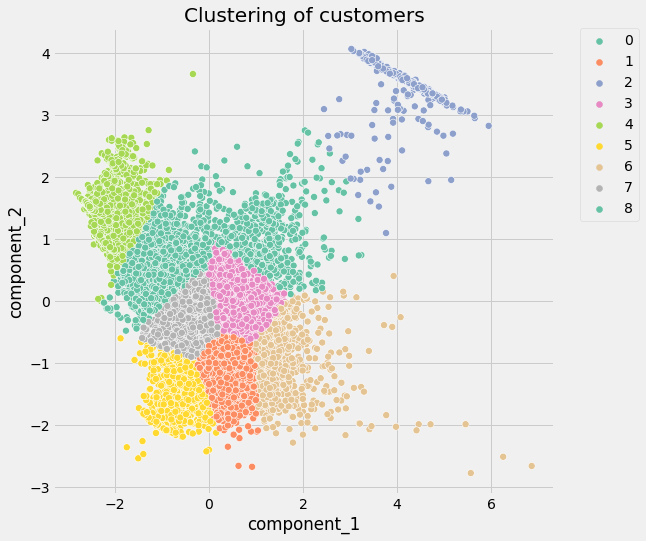

In [37]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))
scat = sns.scatterplot(
"component_1",
"component_2",
s=50,
data=pcadf,
hue="predicted_cluster",
#style="true_label",
palette="Set2",
)
scat.set_title(
"Clustering of customers"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

In [38]:
#df.drop()

In [39]:
df

,customer,order,total_items,discount_percent,weekday,hour,food_percent,fresh_percent,drinks_percent,home_percent,beauty_percent,health_percent,baby_percent,pets_percent
0,0,0,45,23.03,4,13,9.46,87.06,3.48,0.00,0.00,0.00,0.0,0.0
1,0,1,38,1.22,5,13,15.87,75.80,6.22,2.12,0.00,0.00,0.0,0.0
2,0,2,51,18.08,4,13,16.88,56.75,3.37,16.48,6.53,0.00,0.0,0.0
3,1,3,57,16.51,1,12,28.81,35.99,11.78,4.62,2.87,15.92,0.0,0.0
4,1,4,53,18.31,2,11,24.13,60.38,7.78,7.72,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,10235,29995,4,0.00,5,10,5.80,0.00,51.30,0.00,0.00,0.00,0.0,42.9
29996,10236,29996,1,0.00,7,21,0.00,0.00,0.00,0.00,100.00,0.00,0.0,0.0
29997,10237,29997,54,0.00,4,17,9.25,0.00,77.48,13.27,0.00,0.00,0.0,0.0
29998,10237,29998,10,0.00,5,10,0.00,0.00,100.00,0.00,0.00,0.00,0.0,0.0


Estimation of eps

In [40]:
df.drop(['customer'],inplace=True,axis=1)

In [41]:
df.shape

(30000, 13)

In [42]:
df.drop_duplicates("order",keep='first',inplace=True)

In [43]:
df.shape

(30000, 13)

In [44]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

In [45]:
scaler = StandardScaler()
scaled_features1 = scaler.fit_transform(df)

In [48]:
neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(scaled_features1)
distances, indices = neighbors_fit.kneighbors(scaled_features1)

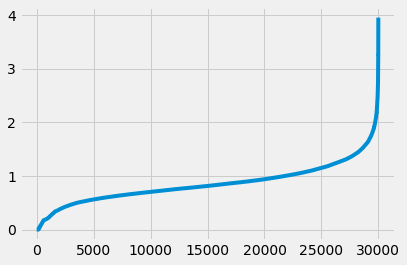

In [49]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
#For 2-dimensional data, use DBSCAN’s default value of MinPts = 4 (Ester et al., 1996)

In [50]:
from sklearn.cluster import DBSCAN


In [51]:
db = DBSCAN(eps=1.5, min_samples = 4).fit(scaled_features1)
labels = db.labels_

In [52]:
labels

array([0, 0, 0, ..., 0, 0, 0])

In [53]:
type(labels)

numpy.ndarray

In [54]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27])

In [55]:
silhouette_score(scaled_features1, labels)

-0.16513838930632405

In [ ]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init= "random",n_init= 10,max_iter= 300,random_state= 42)
    kmeans.fit(dff)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [ ]:
pip install kneed

In [ ]:
from kneed import KneeLocator
kl = KneeLocator(x=range(2, 11),y=silhouette_coefficients,curve="convex", direction="decreasing" )


In [ ]:
kl.elbow

In [ ]:
kl = KneeLocator(x=range(2, 11),y=wcss,curve="convex", direction="decreasing" )


In [ ]:
kl.elbow

In [ ]:
### BUILD A TWO DIMENSIONS CLUSTER AGAIN ###
# k means
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7,random_state=0)
df_customer['cluster'] = kmeans.fit_predict(df_customer[['food_percent', 'fresh_percent', 'drinks_percent', 'home_percent','beauty_percent', 'health_percent', 'baby_percent', 'pets_percent']])


In [ ]:
u_labels = df_customer['cluster'].unique()

In [ ]:
print(u_labels)

In [ ]:
#df_customer.reset_index(inplace=True)

In [ ]:
#df_customer

In [ ]:
df_customer

In [ ]:
temp_df = df_customer[df_customer.cluster == 1]
dff=df_customer.drop('cluster',axis=1)

In [ ]:
df_customer

In [ ]:
#df_customer["cluster" == 0]

In [ ]:
#df['target']=iris['target']
fig, axes = plt.subplots(figsize=(20,20))
#classes = ['cluster-1','cluster-2','cluster-3','cluster-4','cluster-5','cluster-6','cluster-7']
plt.scatter(df_customer[:,0],df_customer[:,1],c=kmeanModel.labels_,cmap='rainbow')
plt.scatter(kmeanModel.cluster_centers_[:,0],kmeanModel.cluster_centers_[:,1],color='black')
plt.title('Cluster of Customers')
#plt.xlabel('')
#plt.ylabel('')
#plt.legend(loc=2)
plt.show()

In [ ]:
df_total_item=df.sort_values('total_items',ascending=False)

In [ ]:
df_total_item